In [125]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

## Probability functions

In [2]:
#returns a vector of length n where each element is drawn
#from a normal dist with mean mu and standard deviation sigma
def norm_vector(mu,sigma,n):
    return np.random.normal(mu,sigma,size=(n))

In [3]:
#returns a vector where element is drawn from a normal distribution with
#mean mu[i] and standard dev sigma[i]
def norm_vec_from_vec(mu,sigma):
    result = np.zeros(len(mu))
    for i in range(len(mu)):
        result[i]=np.random.normal(mu[i],sigma[i])
    return result

In [5]:
n=10

In [8]:
Q_test_star=norm_vector(0,1,10)
Q_test_star

array([-0.53805562,  0.49700072,  1.56384838, -0.56924573, -0.05192986,
       -0.49741303, -0.39545944,  0.09906648,  0.17923069,  0.07421269])

In [9]:
std_array=np.ones(len(Q_test_star))

In [10]:
action_values = norm_vec_from_vec(Q_test_star,std_array)
action_values

array([-1.0718773 ,  1.68550312,  1.72903259,  0.21404073, -2.09669372,
       -1.4321241 , -0.19476931,  1.10301798, -0.89620389,  1.88509606])

In [11]:
num_plays=100
#an action is an index
# action_history = np.array([]).reshape((0,num_plays))
# reward_history = np.array([]).reshape((0,num_plays))
action_history = np.zeros(num_plays)

In [12]:
action_history[0]=1

In [13]:
action_history

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [14]:
action_history = np.array([1,1,1,2,2,2])
reward_history = np.array([1,1,1,0,0,1])

In [15]:
np.dot((action_history==1),reward_history)

3

## Action Value Estimate Function

In [16]:
#create a function that estimates Q (aka value) from reward and
#action history
def getQ(num_actions,action_history,reward_history):
    Q = np.zeros(num_actions).astype('float32')
    for i in range(num_actions):
        if np.sum(action_history==i) == 0:
            Q[i]=0
        else:
            Q[i]=np.dot((action_history==i),reward_history)/(1.*np.sum(action_history==i))
    return Q

In [17]:
getQ(3,action_history,reward_history)

array([ 0.        ,  1.        ,  0.33333334], dtype=float32)

In [18]:
#number of actions or number of arms
num_actions = 10

#generate a list of means to use for normal distribtutions that 
#we will use to draw from for each simulation
means = norm_vector(0,1,num_actions)

#each element of Q_star represents the mean of a distribution
#generate the true action values for a simulation
Q_star = norm_vec_from_vec(Q_test_star,std_array)

#for each play, pick an action a (according to some policy) 
#and then see your reward. The reward will be a random variable 
#drawn from a normal distribution with mean Q_star[a]. 
#Thus, we would want to keep track of what reward came with each action
#Big Idea: better rewards will come from actions with higher Q_star
#Hopefully it learns which action is best
num_plays = 1000
action_history = np.zeros(num_plays)
reward_history = np.zeros(num_plays)

for i in range(num_plays):
    #get action based off Q
    if i == 0:
        action = np.random.randint(0,num_actions)
    else:
        action = np.argmax(getQ(num_actions,action_history,reward_history))
    #employ the actions and get the reward
    reward = np.random.normal(Q_star[action],1)
    
    action_history[i]=action
    reward_history[i]=reward

In [19]:
np.random.randint(0,num_actions)

0

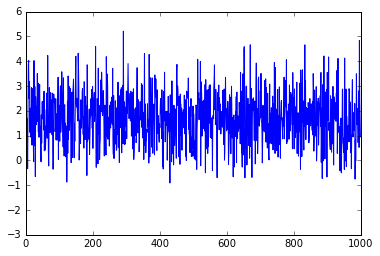

In [20]:
plt.plot(reward_history)

In [21]:
def n_armed_bandit_greedy(n=10,num_plays=100):
    #number of actions or number of arms
    num_actions = n

    #generate a list of means to use for normal distribtutions that 
    #we will use to draw from for each simulation
    means = norm_vector(0,1,num_actions)

    #each element of Q_star represents the mean of a distribution
    #generate the true action values for a simulation
    Q_star = norm_vec_from_vec(Q_test_star,std_array)

    #for each play, pick an action a (according to some policy) 
    #and then see your reward. The reward will be a random variable 
    #drawn from a normal distribution with mean Q_star[a]. 
    #Thus, we would want to keep track of what reward came with each action
    #Big Idea: better rewards will come from actions with higher Q_star
    #Hopefully it learns which action is best
    action_history = np.zeros(num_plays)
    reward_history = np.zeros(num_plays)

    for i in range(num_plays):
        #get action based off Q
        if i == 0:
            action = np.random.randint(0,num_actions)
        else:
            action = np.argmax(getQ(num_actions,action_history,reward_history))
        #employ the actions and get the reward
        reward = np.random.normal(Q_star[action],1)
        
        #store the values
        action_history[i]=action
        reward_history[i]=reward
    
    return reward_history

In [22]:
num_plays = 100
num_sim = 1000
greedy_results = np.zeros(shape=(num_sim,num_plays))
for i in range(num_sim):
    greedy_results[i,:]=n_armed_bandit_greedy(num_plays=num_plays)

In [23]:
greedy_averages=np.average(greedy_results,axis=0)

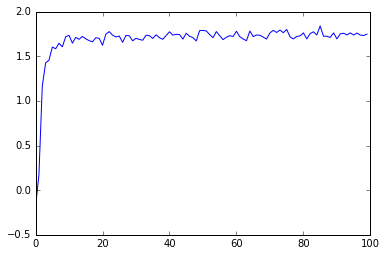

In [24]:
plt.plot(greedy_averages)

# N-armed bandits
## Greedy and $\varepsilon$ methods

In [22]:
def n_armed_bandit(n=10,num_plays=100,epsilon=.1,per_opt=False):
    #number of actions or number of arms
    num_actions = n

    #generate a list of means to use for normal distribtutions that 
    #we will use to draw from for each simulation
    means = norm_vector(0,1,num_actions)

    #each element of Q_star represents the mean of a distribution
    #generate the true action values for a simulation
    Q_star = norm_vec_from_vec(Q_test_star,std_array)

    #for each play, pick an action a (according to some policy) 
    #and then see your reward. The reward will be a random variable 
    #drawn from a normal distribution with mean Q_star[a]. 
    #Thus, we would want to keep track of what reward came with each action
    #Big Idea: better rewards will come from actions with higher Q_star
    #Hopefully it learns which action is best
    action_history = np.zeros(num_plays)
    reward_history = np.zeros(num_plays)

    for i in range(num_plays):
        #get action greedily based off Q and random epsilon
        if i == 0:
            action = np.random.randint(0,num_actions)
        else:
            #generate random number
            rand_num = np.random.rand()
            greedy_action = np.argmax(getQ(num_actions,
                                           action_history,reward_history))
            if rand_num<epsilon:
                action_space = np.delete(np.arange(num_actions),
                                         greedy_action)
                action=np.random.choice(action_space)
            else:
                action= greedy_action
        #employ the actions and get the reward
        reward = np.random.normal(Q_star[action],1)
        
        #store the values
        action_history[i]=action
        reward_history[i]=reward
    
    if per_opt:
        action_opt = np.argmax(Q_star)
        reward_history=100.*(action_history==action_opt)
    
    return reward_history

In [260]:
num_plays = 1000
num_sim = 2000
epsilon1_results = np.zeros(shape=(num_sim,num_plays))
epsilon10_results = np.zeros(shape=(num_sim,num_plays))
greedy_results = np.zeros(shape=(num_sim,num_plays))
for i in range(num_sim):
    epsilon1_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=.01,per_opt=False)
    epsilon10_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=.1,per_opt=False)
    greedy_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=0,per_opt=False)

In [261]:
#averages
epsilon1_averages=np.mean(epsilon1_results,axis=0)
epsilon10_averages=np.mean(epsilon10_results,axis=0)
greedy_averages=np.mean(greedy_results,axis=0)

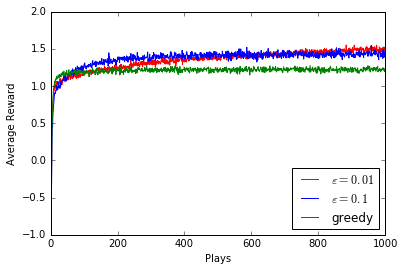

In [279]:
#plots
x_axis=range(num_plays)
plt.plot(x_axis,epsilon1_averages,'r',x_axis,epsilon10_averages,'b',x_axis,greedy_averages,'g')
plt.ylabel('Average Reward')
plt.xlabel('Plays')
plt.legend([r'$\varepsilon=0.01$',r'$\varepsilon=0.1$','greedy'],loc=4)

In [285]:
num_plays = 1000
num_sim = 200
epsilon1_results = np.zeros(shape=(num_sim,num_plays))
epsilon10_results = np.zeros(shape=(num_sim,num_plays))
greedy_results = np.zeros(shape=(num_sim,num_plays))
for i in range(num_sim):
    epsilon1_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=.01,per_opt=True)
    epsilon10_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=.1,per_opt=True)
    greedy_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=0,per_opt=True)

In [286]:
#averages
epsilon1_averages=np.mean(epsilon1_results,axis=0)
epsilon10_averages=np.mean(epsilon10_results,axis=0)
greedy_averages=np.mean(greedy_results,axis=0)

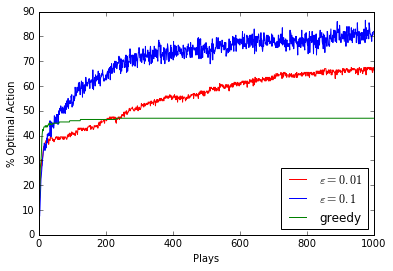

In [288]:
#plots
x_axis=range(num_plays)
plt.plot(x_axis,epsilon1_averages,'r',x_axis,epsilon10_averages,'b',x_axis,greedy_averages,'g')
plt.ylabel('% Optimal Action')
plt.xlabel('Plays')
plt.legend([r'$\varepsilon=0.01$',r'$\varepsilon=0.1$','greedy'],loc=4)

# Softmax Action Decisions

In [23]:
def softmax_action(Q,temp):
    x = Q/(1.*temp)
    x_prime = x-np.max(x)
    return np.exp(x_prime)/np.sum(np.exp(x_prime))
    #return np.exp(Q/temp)/np.sum(np.exp(Q/temp))

In [24]:
def n_armed_bandit_softmax(n=10,num_plays=100,temp=1):
    #number of actions or number of arms
    num_actions = n

    #generate a list of means to use for normal distribtutions that 
    #we will use to draw from for each simulation
    means = norm_vector(0,1,num_actions)

    #each element of Q_star represents the mean of a distribution
    #generate the true action values for a simulation
    Q_star = norm_vec_from_vec(Q_test_star,std_array)

    #for each play, pick an action a (according to some policy) 
    #and then see your reward. The reward will be a random variable 
    #drawn from a normal distribution with mean Q_star[a]. 
    #Thus, we would want to keep track of what reward came with each action
    #Big Idea: better rewards will come from actions with higher Q_star
    #Hopefully it learns which action is best
    action_history = np.zeros(num_plays)
    reward_history = np.zeros(num_plays)

    for i in range(num_plays):
        #get action based off Q
        if i == 0:
            action = np.random.randint(0,num_actions)
        else:
            Q = getQ(num_actions,action_history,reward_history)
            Q_softmax = softmax_action(Q,temp=temp)
            action = np.argmax(Q_softmax)
        #employ the actions and get the reward
        reward = np.random.normal(Q_star[action],1)
        
        #store the values
        action_history[i]=action
        reward_history[i]=reward
    
    return reward_history

In [25]:
num_plays = 100
num_sim = 1000
softmax_results = np.zeros(shape=(num_sim,num_plays))
for i in range(num_sim):
    softmax_results[i,:]=n_armed_bandit_softmax(num_plays=num_plays,temp=.1)

In [26]:
softmax_averages=np.average(softmax_results,axis=0)

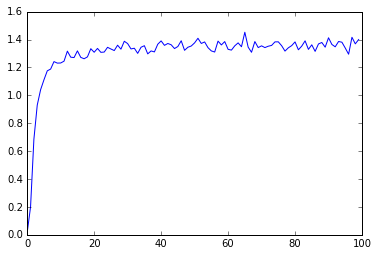

In [27]:
plt.plot(softmax_averages)

# Incremental Implemenation

Implement $Q_{k+1}(a) = Q_{k_a}+\frac{1}{k_a+1}[r_{k_a+1}-Q_{k_a}]$

In [28]:
def update_Q(k_a,action,reward,Q):
    #k_a = sum(action_history==action)
    Q[action] = Q[action]+1./(k_a+1)*(reward-Q[action])
    return Q

In [41]:
def n_armed_bandit(n=10,num_plays=100,epsilon=.1,per_opt=False):
    #number of actions or number of arms
    num_actions = n

    #generate a list of means to use for normal distribtutions that 
    #we will use to draw from for each simulation
    means = norm_vector(0,1,num_actions)

    #each element of Q_star represents the mean of a distribution
    #generate the true action values for a simulation
    Q_star = norm_vec_from_vec(Q_test_star,std_array)

    #for each play, pick an action a (according to some policy) 
    #and then see your reward. The reward will be a random variable 
    #drawn from a normal distribution with mean Q_star[a]. 
    #Thus, we would want to keep track of what reward came with each action
    #Big Idea: better rewards will come from actions with higher Q_star
    #Hopefully it learns which action is best
    reward_history = np.zeros(num_plays)
    
    #instead of keeping track of the complete actions and reward history
    #just keep track of how many times an actions has been used thus far
    #and iteratively update it's value
    k_a = np.zeros(num_actions)
    Q = np.zeros(num_actions)
    for i in range(num_plays):
        #get action greedily based off Q and random epsilon
        if i == 0:
            action = np.random.randint(0,num_actions)
        else:
            #generate random number
            rand_num = np.random.rand()
            
            #find the greedy action
            greedy_action = np.argmax(Q)
            
            #pick the non-greed action if necessary
            if rand_num<epsilon:
                action_space = np.delete(np.arange(num_actions),
                                         greedy_action)
                action=np.random.choice(action_space)
            else:
                action= greedy_action
        
        #employ the actions and get the reward
        reward = np.random.normal(Q_star[action],1)
        
        #update Q and then k_a
        Q = update_Q(k_a[action],action,reward,Q)
        k_a[action]=k_a[action]+1
        
        #store the reward history
        if per_opt:
            action_opt = np.argmax(Q_star)
            reward_history[i]=action_opt == action
        else:
            reward_history[i]=reward
    
    
    
    return reward_history

In [42]:
num_plays = 1000
num_sim = 2000
epsilon1_results = np.zeros(shape=(num_sim,num_plays))
epsilon10_results = np.zeros(shape=(num_sim,num_plays))
greedy_results = np.zeros(shape=(num_sim,num_plays))
for i in range(num_sim):
    epsilon1_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=.01,per_opt=False)
    epsilon10_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=.1,per_opt=False)
    greedy_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=0,per_opt=False)

In [43]:
#averages
epsilon1_averages=np.mean(epsilon1_results,axis=0)
epsilon10_averages=np.mean(epsilon10_results,axis=0)
greedy_averages=np.mean(greedy_results,axis=0)

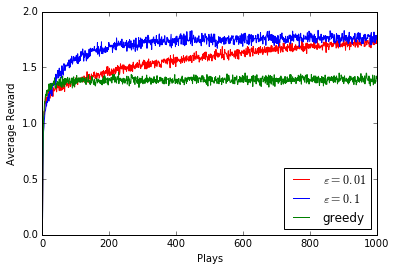

In [44]:
#plots
x_axis=range(num_plays)
plt.plot(x_axis,epsilon1_averages,'r',x_axis,epsilon10_averages,'b',x_axis,greedy_averages,'g')
plt.ylabel('Average Reward')
plt.xlabel('Plays')
plt.legend([r'$\varepsilon=0.01$',r'$\varepsilon=0.1$','greedy'],loc=4)

That was about 30 times faster than the original method

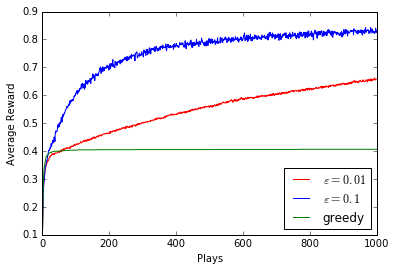

In [45]:
num_plays = 1000
num_sim = 2000
epsilon1_results = np.zeros(shape=(num_sim,num_plays))
epsilon10_results = np.zeros(shape=(num_sim,num_plays))
greedy_results = np.zeros(shape=(num_sim,num_plays))
for i in range(num_sim):
    epsilon1_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=.01,per_opt=True)
    epsilon10_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=.1,per_opt=True)
    greedy_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=0,per_opt=True)

#averages
epsilon1_averages=np.mean(epsilon1_results,axis=0)
epsilon10_averages=np.mean(epsilon10_results,axis=0)
greedy_averages=np.mean(greedy_results,axis=0)

#plots
x_axis=range(num_plays)
plt.plot(x_axis,epsilon1_averages,'r',x_axis,epsilon10_averages,'b',x_axis,greedy_averages,'g')
plt.ylabel('Average Reward')
plt.xlabel('Plays')
plt.legend([r'$\varepsilon=0.01$',r'$\varepsilon=0.1$','greedy'],loc=4)

# Nonstationary

$ Q_{k+1}=Q_k+\alpha[r_{k+1}-Q_k]$ 

where $0<\alpha\leq1$

# Optimistic Initial Values

In [57]:
def update_Q(k_a,action,reward,Q,step_size=-1):
    if step_size == -1:
        step_size=1./(k_a+1)
    Q[action] = Q[action]+step_size*(reward-Q[action])
    return Q

In [65]:
def n_armed_bandit(n=10,num_plays=100,epsilon=.1,per_opt=False,step_size=-1):
    #number of actions or number of arms
    num_actions = n

    #generate a list of means to use for normal distribtutions that 
    #we will use to draw from for each simulation
    means = norm_vector(0,1,num_actions)

    #each element of Q_star represents the mean of a distribution
    #generate the true action values for a simulation
    Q_star = norm_vec_from_vec(Q_test_star,std_array)

    #for each play, pick an action a (according to some policy) 
    #and then see your reward. The reward will be a random variable 
    #drawn from a normal distribution with mean Q_star[a]. 
    #Thus, we would want to keep track of what reward came with each action
    #Big Idea: better rewards will come from actions with higher Q_star
    #Hopefully it learns which action is best
    reward_history = np.zeros(num_plays)
    
    #instead of keeping track of the complete actions and reward history
    #just keep track of how many times an actions has been used thus far
    #and iteratively update it's value
    k_a = np.zeros(num_actions)
    Q = np.zeros(num_actions)
    for i in range(num_plays):
        #get action greedily based off Q and random epsilon
        if i == 0:
            action = np.random.randint(0,num_actions)
        else:
            #generate random number
            rand_num = np.random.rand()
            
            #find the greedy action
            greedy_action = np.argmax(Q)
            
            #pick the non-greed action if necessary
            if rand_num<epsilon:
                action_space = np.delete(np.arange(num_actions),
                                         greedy_action)
                action=np.random.choice(action_space)
            else:
                action= greedy_action
        
        #employ the actions and get the reward
        reward = np.random.normal(Q_star[action],1)
        
        #update Q and then k_a
        Q = update_Q(k_a[action],action,reward,Q,step_size)
        k_a[action]=k_a[action]+1
        
        #store the reward history
        if per_opt:
            action_opt = np.argmax(Q_star)
            reward_history[i]=action_opt == action
        else:
            reward_history[i]=reward
    
    return reward_history

def n_armed_bandit_optimistic(n=10,num_plays=100,epsilon=.1,per_opt=False,step_size=-1):
    #number of actions or number of arms
    num_actions = n

    #generate a list of means to use for normal distribtutions that 
    #we will use to draw from for each simulation
    means = norm_vector(0,1,num_actions)

    #each element of Q_star represents the mean of a distribution
    #generate the true action values for a simulation
    Q_star = norm_vec_from_vec(Q_test_star,std_array)

    #for each play, pick an action a (according to some policy) 
    #and then see your reward. The reward will be a random variable 
    #drawn from a normal distribution with mean Q_star[a]. 
    #Thus, we would want to keep track of what reward came with each action
    #Big Idea: better rewards will come from actions with higher Q_star
    #Hopefully it learns which action is best
    reward_history = np.zeros(num_plays)
    
    #instead of keeping track of the complete actions and reward history
    #just keep track of how many times an actions has been used thus far
    #and iteratively update it's value
    k_a = np.zeros(num_actions)
    Q = 5*np.ones(num_actions)
    for i in range(num_plays):
        #get action greedily based off Q and random epsilon
        if i == 0:
            action = np.random.randint(0,num_actions)
        else:
            #generate random number
            rand_num = np.random.rand()
            
            #find the greedy action
            greedy_action = np.argmax(Q)
            
            #pick the non-greed action if necessary
            if rand_num<epsilon:
                action_space = np.delete(np.arange(num_actions),
                                         greedy_action)
                action=np.random.choice(action_space)
            else:
                action= greedy_action
        
        #employ the actions and get the reward
        reward = np.random.normal(Q_star[action],1)
        
        #update Q and then k_a
        Q = update_Q(k_a[action],action,reward,Q,step_size)
        k_a[action]=k_a[action]+1

        #store the reward history
        if per_opt:
            action_opt = np.argmax(Q_star)
            reward_history[i]=action_opt == action
        else:
            reward_history[i]=reward

    return reward_history

In [67]:
num_plays = 1000
num_sim = 2000
optimisitc_results = np.zeros(shape=(num_sim,num_plays))
realistic_results = np.zeros(shape=(num_sim,num_plays))
for i in range(num_sim):
    optimisitc_results[i,:]=n_armed_bandit_optimistic(num_plays=num_plays,epsilon=0,per_opt=True,step_size=0.1)
    realistic_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=.1,per_opt=True,step_size=0.1)

In [68]:
#averages
optimisitc_averages=np.mean(optimisitc_results,axis=0)
realistic_averages=np.mean(realistic_results,axis=0)

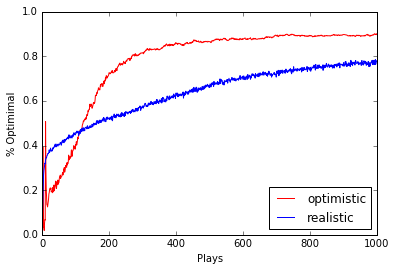

In [69]:
#plots
x_axis=range(num_plays)
plt.plot(x_axis,optimisitc_averages,'r',x_axis,realistic_averages,'b')
plt.ylabel('% Optimimal')
plt.xlabel('Plays')
plt.legend([r'optimistic',r'realistic'],loc=4)

# Reinforcement Comparison

$\pi_t(a) = \frac{e^{p_t(a)}}{\sum_{b=1}^{n} e^{p_t(b)}} $

$p_{t+1}(a_t)=p_t(a_t)+\beta[r_t-\bar{r}_t]$

$\bar{r}_{t+1}=\bar{r}_t+\alpha [r_t-\bar{r}_t]$

In [79]:
#input:a probability mass function
#output: corresponding cdf
def getCDF(pmf):
    cdf = np.zeros(len(pmf))
    running_total = 0
    for i,p in enumerate(pmf):
        running_total += p
        cdf[i] = running_total
    return cdf

#returns the action index from a probiblity distribution
def getAction(prob):
    cdf = getCDF(prob)
    rand_num = np.random.rand()
    #rand_num = random.random()
    return np.argmax(cdf==cdf[np.argmax(cdf>rand_num)])

In [115]:
def n_armed_bandit_reincomp(n=10,num_plays=100,epsilon=.1,per_opt=False,alpha=.1,beta=.1):
    #number of actions or number of arms
    num_actions = n

    #generate a list of means to use for normal distribtutions that 
    #we will use to draw from for each simulation
    means = norm_vector(0,1,num_actions)

    #each element of Q_star represents the mean of a distribution
    #generate the true action values for a simulation
    Q_star = norm_vec_from_vec(Q_test_star,std_array)

    #Log the reward after each action
    reward_history = np.zeros(num_plays)
    
    #keep track of action preference and reference reward
    ref_reward=0
    pref_action = np.zeros(num_actions)

    #initialize policy
    pol = softmax_action(pref_action,temp=1)
    
    for i in range(num_plays):
        action = getAction(pol)

        #employ the actions and get the reward
        reward = np.random.normal(Q_star[action],1)
        
        #update ref_reward and pref
        pref_action[action]=pref_action[action]+beta*(reward-ref_reward)
        ref_reward = ref_reward+alpha*(reward-ref_reward)
        pol = softmax_action(pref_action,temp=1)
        
        #store the reward history
        if per_opt:
            action_opt = np.argmax(Q_star)
            reward_history[i]=action_opt == action
        else:
            reward_history[i]=reward
    
    return reward_history

In [116]:
num_plays = 1000
num_sim = 2000
ep_gred1_results = np.zeros(shape=(num_sim,num_plays))
ep_gred2_results = np.zeros(shape=(num_sim,num_plays))
reincomp_results = np.zeros(shape=(num_sim,num_plays))
for i in range(num_sim):
    ep_gred1_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=.1,per_opt=True,step_size=-1)
    ep_gred2_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=.1,per_opt=True,step_size=0.1)
    reincomp_results[i,:]=n_armed_bandit_reincomp(num_plays=num_plays,epsilon=0,per_opt=True,alpha=.1,beta=0.1)

In [117]:
#averages
ep_gred1_averages=np.mean(ep_gred1_results,axis=0)
ep_gred2_averages=np.mean(ep_gred2_results,axis=0)
reincomp_averages=np.mean(reincomp_results,axis=0)

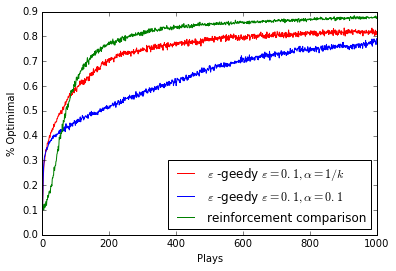

In [118]:
#plots
x_axis=range(num_plays)
plt.plot(x_axis,ep_gred1_averages,'r',x_axis,ep_gred2_averages,'b',x_axis,reincomp_averages,'g')
plt.ylabel('% Optimimal')
plt.xlabel('Plays')
plt.legend([r'$\varepsilon$ -geedy $\varepsilon = 0.1, \alpha = 1/k$',
            r'$\varepsilon$ -geedy $\varepsilon = 0.1, \alpha = 0.1$',
            r'reinforcement comparison'],loc=4)

# Pursuit Methods

$\pi_{t+1}(a^*_{t+1})=\pi_{t}(a^*_{t+1})+\beta[1-\pi_{t}(a^*_{t+1})]$

$\pi_{t+1}(a)=\pi_{t}(a)+\beta[0-\pi_{t}(a)] \quad \forall a \neq a_{t+1}^*$

In [235]:
def n_armed_bandit_pursuit(n=10,num_plays=100,per_opt=False,alpha=.1,beta=.1):
    #number of actions or number of arms
    num_actions = n

    #generate a list of means to use for normal distribtutions that 
    #we will use to draw from for each simulation
    means = norm_vector(0,1,num_actions)

    #each element of Q_star represents the mean of a distribution
    #generate the true action values for a simulation
    Q_star = norm_vec_from_vec(Q_test_star,std_array)

    #Log the reward after each action
    reward_history = np.zeros(num_plays)
    
    #keep track of k_a, Q
    k_a = np.zeros(num_actions)
    Q = 5*np.ones(num_actions)


    #initialize policy, which are the action preferences
    pol = (1./num_actions)*np.ones(num_actions)
    #print pol
    
    for i in range(num_plays):
        #picks an action from the current policy
        action = getAction(pol)

        #employ the actions and get the reward
        reward = np.random.normal(Q_star[action],1)
        
        
        #update Q and then k_a
        Q = update_Q(k_a[action],action,reward,Q,alpha)
        k_a[action]=k_a[action]+1
        
        
        #update policy
        a_opt = np.argmax(Q)
        pol[a_opt]=pol[a_opt]+beta*(1-pol[a_opt])
        not_opt_act = range(num_actions)
        not_opt_act.remove(a_opt)
        for j in not_opt_act:
            pol[j]=pol[j]+beta*(0-pol[j])
        
        #store the reward history
        if per_opt:
            action_opt = np.argmax(Q_star)
            reward_history[i]=action_opt == action
        else:
            reward_history[i]=reward
        
        #print pol
    
    return reward_history

In [242]:
num_plays = 1000
num_sim = 2000
ep_gred_results = np.zeros(shape=(num_sim,num_plays))
reincomp_results = np.zeros(shape=(num_sim,num_plays))
pursuit_results = np.zeros(shape=(num_sim,num_plays))
for i in tqdm(range(num_sim)):
    ep_gred_results[i,:]=n_armed_bandit(num_plays=num_plays,epsilon=.1,per_opt=True,step_size=-1)
    reincomp_results[i,:]=n_armed_bandit_reincomp(num_plays=num_plays,epsilon=0,per_opt=True,alpha=.1,beta=0.1)
    pursuit_results[i,:]=n_armed_bandit_pursuit(num_plays=num_plays,per_opt=True,alpha=-1,beta=0.01)

100%|██████████| 2000/2000 [02:36<00:00, 12.77it/s]


In [243]:
#averages
ep_gred_averages=np.mean(ep_gred_results,axis=0)
reincomp_averages=np.mean(reincomp_results,axis=0)
pursuit_averages=np.mean(pursuit_results,axis=0)

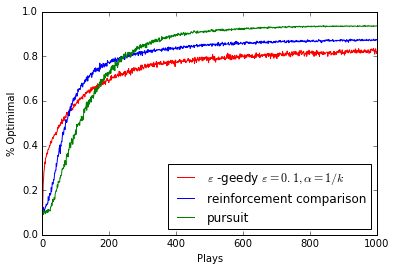

In [244]:
#plots
x_axis=range(num_plays)
plt.plot(x_axis,ep_gred_averages,'r',x_axis,reincomp_averages,'b',x_axis,pursuit_averages,'g')
plt.ylabel('% Optimimal')
plt.xlabel('Plays')
plt.legend([r'$\varepsilon$ -geedy $\varepsilon = 0.1, \alpha = 1/k$',
            r'reinforcement comparison',
            r'pursuit'],loc=4)